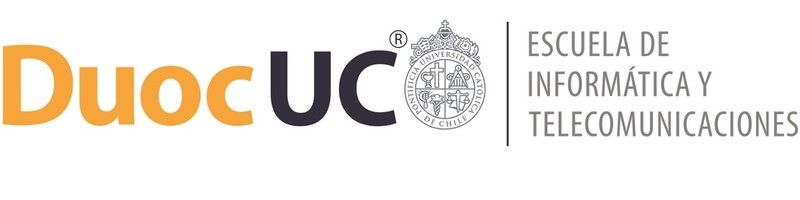

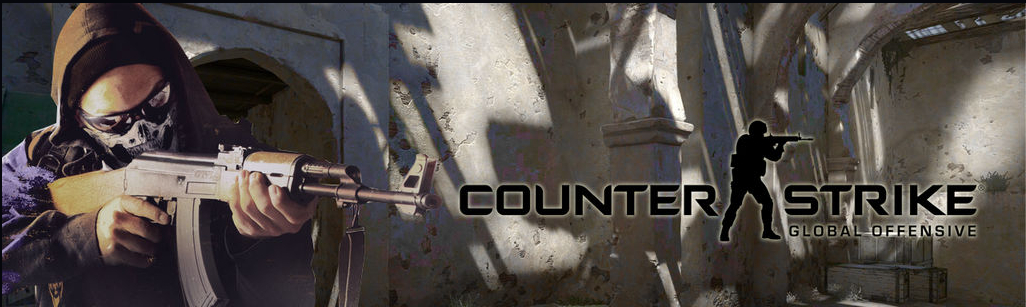

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrante:
* Pablo Maldonado Presas

Docente: Arturo Guerra Castro    

Sección: FMY0100 - 005V

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor total del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

Valve es una empresa desarrolladora y distribuidora dentro de la industria de los videojuegos, que se ha encargado de crear y lanzar títulos populares como Half-Life, Counter-Strike, Dota y Portal.

Counter-Srike: Global-Offensive (CS:GO) es la última entrega de la serie Counter-Strike, un juego de disparos en primera persona (FPS, por su sigla en inglés), que ha congregado a miles de jugadores alrededor del mundo para jugar de manera amistosa o competitiva, suscitando torneos locales e incluso internacionales.

Valve ha solicitado al equipo de análisis de datos y modelado de Machine Learning un análisis y realización de modelos predictivos sobre los datos. En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida.

Es importante señalar que en las partidas participan un máximo de 10 jugadores (5 en cada equipo) y se enfrentan al mejor de 30 rondas. Además, las primeras 15 rondas cada equipo juega en un bando (Terrorista o Contraterrorista) elegido al azar y, en las restantes 15 rondas (si hacen falta para determinar al ganador) los equipos cambian al otro bando.

---

**Condiciones de victoria:**
* El primer equipo en ganar 16 rondas gana el partido.
* Si ambos equipos ganan 15 rondas cada uno, el partido termina en empate, a menos que se juegue una prórroga (solo en partidos de torneo y ligas).

**Condiciones para Ganar una Ronda:**
* Terroristas:
  - Plantar la bomba y que explote.
  - Eliminar a todos los antiterroristas antes de que se acabe el tiempo.
* Antiterroristas:
  - Desactivar la bomba una vez plantada.
  - Evitar que los terroristas planten la bomba hasta que se acabe el tiempo.
  - Eliminar a todos los terroristas antes de que planten la bomba.

---

El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego. Dichas variables están listadas y descritas en la tabla de más arriba.

---

Tanto el contexto del negocio, como las características del conjunto de datos, permite abordar el proyecto desde, por lo menos, dos enfoques diferentes:

---

1) Desarrollo de un modelo predictivo que permita mejorar el emparejamiento en partidas CS:GO, con el fin de proporcionar una experiencia que favorezca tanto a jugadores experimentados como a los más nuevos.

Para ello, se pueden tomar en cuenta los siguientes aspectos:
* Identificación de patrones de victoria en función de las características del equipo y de cada jugador.
* Consideración de las características más relevantes para el emparejamiento como, por ejemplo, si ciertos mapas favorecen a un equipo específico.
* Análisis de las columnas relacionadas con las habilidades de los jugadores, para evaluar su nivel y, de ese modo, ayudar a agrupar a jugadores con niveles de habilidad similares.

Para un **Modelo de Regresión**, el objetivo sería predecir una variable numérica continua, como el rendimiento individual de un jugador en una partida en particular. Esto ayudaría a que el juego pueda emparejarse sobre la marcha, es decir, entre una partida y otra, o incluso, si es que existe un desequilibrio marcado entre ambos equipos, entre una ronda y otra.

Para un **Modelo de Clasificación**, el objetivo sería predecir una variable categórica, como si un equipo ganará o perderá una partida en función de elemento externos, por ejemplo, el mapa y el equipo (Terrorist o Counter-Terrorist), para emparejar en consecuencia.

---

2) Desarrollo de un modelo de Machine Learning, que permita predecir si un jugador podrá o no sobrevivir en una ronda de CS:GO.

En este sentido, la hipótesis es que hay ciertos parámetros que, según su valor, aumentan o disminuyen la probabilidad de que un jugador sobreviva en una ronda. Para ello, se estudiará el conjunto de datos inicial, para buscar una variable objetivo y otras predictoras, estableciendo sus posibles relaciones y analizando los resultados de éstas.

Para ello, se pueden tomar en cuenta los siguientes aspectos:
* Identificación de patrones de sobrevivencia en función de las características de cada jugador y el equipo al que pertenece.
* Consideración de las características más relevantes para estos patrones como, por ejemplo, si ciertos mapas, armas y comportamientos de jugadores determinan una mayor probabilidad de sobrevivir.
* Por lo anterior, las funciones, métodos y algoritmos para analizar el conjunto de datos trabajarán línea por línea, registro por registro.

In [2]:
# Primero que nada, se importan las librerías de Python fundamentales para el análisis exploratorio de los datos.
import pandas as pd # Herramienta de análisis de datos
import numpy as np # Herramienta con soporte para matrices multidimensionales y funciones matemáticas
import matplotlib.pyplot as plt # Biblioteca de visualización Matplotlib de Python, para gráficos y visualizaciones de datos
import seaborn as sb # Biblioteca de visualización de datos basada en Matplotlib

In [3]:
# Se importa el dataset desde un repositorio de Github, cuyas columnas están separadas por punto y coma,
# y se almacena en la variable df.
dir = 'Anexo ET_demo_round_traces.csv'
df = pd.read_csv(dir, sep=";")

C:\Users\pablo\AppData\Local\Temp\ipykernel_11436\58391397.py:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dir, sep=";")


Debido a que se genera un problema en las columnas 7 y 8 del dataset (en Python las 6 y 7, considerando que este lenguaje las enumera desde el índice 0), se necesita especificar el tipo de dato para dos columnas de tipo booleano.

El problema se origina por la presencia de datos vacíos y erróneos en dicho campo en algunos de los registros. Por el contrario, en las otras columnas (de tipo string y numérico) no se genera conflicto de importación ni tampoco hay datos erróneos.

## Fase 2: Data Understanding

In [ ]:
# Del DataFrame se obtiene el número de filas o registros, seguido por el número de columnas o campos.
df.shape

(79157, 30)

En la sección de contexto del negocio, se hace referencia a 29 columnas, pero el dataset posee exactamente 30, debido a que existe una primera columna, sin nombre, con el id de cada registro.

In [ ]:
# Lista con los nombres de cada columna
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
# Una muestra de las primeras 5 filas del DataFrame
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
# Resumen de la información y estructura del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

En la salida anterior se muestran los índices, nombres y tipos de dato de cada columna del DataFrame, como también el número de datos contabilizados como no nulos (non-null).

Es importante destacar que, pese a que no se detecta ningún dato nulo, no quiere decir que no hayan datos vacíos o faltantes. La razón detrás de esto es que df.info() solo cuenta los valores no nulos, pero no detecta explícitamente los valores vacíos o faltantes.

Como se puede observar, el DataFrame cuenta con datos de distinto tipo:

*  **object**: Cadenas de texto.
*  **int64**: Valores enteros.
*  **float64**: Valores de punto flotante (con decimales)
*  **bool**: Valores booleanos, True o False, que sirven para representar    condiciones lógicas.

No obstante, las columnas 'RoundWinner' y 'MatchWinner' son interpretadas como de tipo object, ya que aún no se efectúa el cambio al tipo adecuado, que sería booleano.

In [ ]:
# Suma total de valores faltantes o nulos en cada columna.
df.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
# Registros con datos nulos
df[df.isnull().any(axis=1)]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
13,613,de_inferno,NaN,1,4,2,True,True,False,False,...,0,0,0,0,300,1300,0,0,0,0
27,627,de_inferno,NaN,2,4,3,False,False,True,False,...,1,0,0,0,3250,22850,2,0,1,1
29,629,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,...,0,0,0,0,4250,22850,2,0,1,2


A partir de los resultados de los registros con valores nulos, en vez de eliminar dichos registros, se puede inferir el valor en relación a los cercanos anteriores y posteriores.

Por un lado, en los registros de los índices 13 y 27 el valor nulo corresponde a 'Team', que se puede inferir a partir del campo 'InternalTeamId' (Id 1 para Terrorist e Id 2 para CounterTerrorist).

Por otro lado, 'MatchWinner' es un campo compartido entre los integrantes de un mismo equipo, por lo que para el registro de índice 29 se infiere que su valor es False; asimismo, el valor del campo 'RoundWinner' del mismo registro es erróneo (False4), pero fácilmente se puede reemplazar por su valor correcto (False).

---

**La imputación de datos en dichos registros se hará en la siguiente fase, correspondiente a la preparación de datos**

---



Ahora bien, nos falta redefinir el tipo de dato de algunas columnas más:
* 'RoundWinner'
* 'MatchWinner'
* 'Survived'
* 'TimeAlive'
* 'TravelledDistance'
* 'FirstKillTime'

In [ ]:
# Consultamos nuevamente el tipo de dato para los campos mencionados
df[['RoundWinner', 'MatchWinner', 'Survived', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']].dtypes

RoundWinner          object
MatchWinner          object
Survived               bool
TimeAlive            object
TravelledDistance    object
FirstKillTime        object
dtype: object

Se observa que todos los campos, exceptuando 'Survived', se definen como de tipo object (cadena de caracteres), pero no debiera ser así, porque los tres primeros debieran ser de tipo booleano y los tres últimos de tipo numérico. Por lo tanto, se efectuará su redefinición en la siguiente fase.

***Dentro de esos campos ya podemos ubicar la variable objetivo sobre la que se podría fundamentar el modelo predictivo: 'Survived'. Por eso, se destaca la importancia de convertirlo a un tipo de campo para la generación y el entrenamiento óptimo de modelo.***

---

**La redefinición de tipo de dato para los campos mencionados se hará en la siguiente fase, correspondiente a la preparación de datos**

---


Antes de seguir estudiando y analizando el conjunto de datos, es necesario detenerse en dos campos que, según una observación atenta al archivo CSV del que se alimenta el DataFrame, no aportarían en absolutamente nada al estudio estadístico y al desarrollo del modelo de Machine Learning.

Estos son:
* 'Unnamed: 0': Campo nombrado así automáticamente al importar el Dataset, ya que no posee etiqueta propia. Corresponde al correlativo numérico de cada registro.

* 'AbnormalMatch': Indica si la partida del jugador tuvo un error por conexión de red.

In [ ]:
# Vista de las primeras y últimas 5 filas del Dataframe, reflejando únicamente los resultados de los campos mencionados
df[['Unnamed: 0', 'AbnormalMatch']]

,Unnamed: 0,AbnormalMatch
0,600,False
1,601,False
2,602,False
3,603,False
4,604,False
...,...,...
79152,123775,False
79153,123776,False
79154,123777,False
79155,123778,False


Por una parte, está claro que el primer campo mencionado no aportaría nada al estudio y, por otra, el segundo posee el mismo resultado para todos los registros (False). Entonces, se eliminarán del DataFrame.

---

**La eliminación de los campos mencionados se hará en la siguiente fase, correspondiente a la preparación de datos**

---

### Tipos de dato:

In [ ]:
# Visualicemos nuevamente el DataFrame, con una muestra de los 5 primeros registros
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


Según lo observado hasta ahora, en el DataFrame poseemos campos con diferentes tipos de dato, algunos de los cuales no son redefinidos aún (lo que se efectuará en la siguiente fase). Por consiguiente, a continuación procedemos con agrupar los campos según el tipo de dato que tendría si ya se realizarán las conversiones requeridas.

### Campos y Tipos de dato:
*   **Categórico ordinal:** 'Unnamed: 0', 'MatchId', 'RoundId'.

*   **Categórico nominal:** 'Map', 'Team', 'InternalTeamId', 'RoundWinner', MatchWinner', 'Survived', 'AbnormalMatch'.

*   **Numérico discreto:** 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'.

*   **Numérico continuo:** 'TimeAlive', 'TravelledDistance', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime'.

In [ ]:
# Para el análisis de los campos y sus agregaciones, se asigna una variable por cada tipo de dato
# Además, se asigna a una variable todo el conjunto categórico, lo mismo para todo el conjunto numérico
df_ordinales = df[['MatchId', 'RoundId']]
df_nominales = df[['Map', 'Team', 'InternalTeamId', 'RoundWinner', 'MatchWinner', 'Survived']]
df_discretos = df[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']]
df_continuos = df[['TimeAlive', 'TravelledDistance', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime']]
df_categoricos = df[['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived']]
df_numericos = df[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'TimeAlive', 'TravelledDistance', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime']]

***La distribución de estos campos nos permite vislumbrar aquellos que posiblemente tengan relación con el campo/variable objetivo ('Survived'), que, en este caso, serían los que están dentro del conjunto df_numericos.***

---
### Características de las partidas de CS:GO



In [ ]:
# Cantidad total de partidas
match_counts = df['MatchId'].nunique()

match_counts

333

In [ ]:
# Cantidad total de rondas
df_rounds_count = df_categoricos.copy()

df_rounds_count['MatchRoundId'] = df_rounds_count['MatchId'].astype(str) + '_' + df_rounds_count['RoundId'].astype(str)

rounds_count = df_rounds_count['MatchRoundId'].nunique()

rounds_count

7916

Lo anterior nos señala que el Dataset posee el registro de 333 partidas, con un total de 7916 rondas distribuidades entre éstas.

---

### Gráficos de barras y de distribución

A continuación, se disponen de algunos gráficos para visualizar a grandes rasgos los resultados de todas las partidas registradas en el conjunto de datos.

#### Cantidad de MatchKills por bando

Gráfico de barras que muestra la cantidad de muertes por partida para cada bando, en intervalos de 5 unidades de MatchKills, iniciando con el valor 0. Es decir, los intervalos son: de 0 a 4, 5 a 9, 10 a 14, y así.

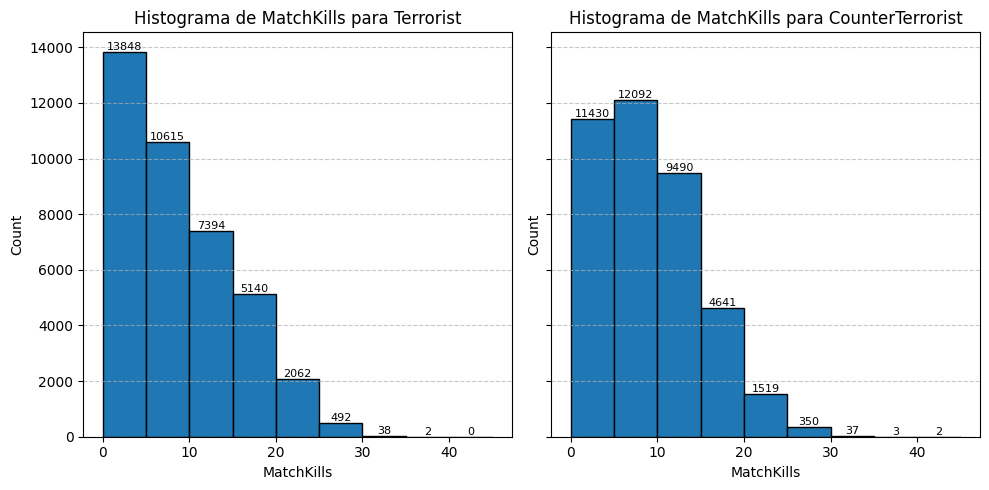

In [ ]:
# Primero, obtener los equipos sin NaN
teams = df['Team'].dropna().unique()

# Luego, definir los intervalos cerrados
intervalos = np.arange(0, int(df['MatchKills'].max()) + 6, 5)

# Crear subplots para cada equipo
fig, axs = plt.subplots(1, len(teams), figsize=(len(teams)*5, 5), sharey=True)

# Generar histograma para cada equipo
for i, team in enumerate(teams):
    ax = axs[i]
    team_data = df[df['Team'] == team]['MatchKills']
    ax.hist(team_data, bins=intervalos, edgecolor='black')
    ax.set_xlabel('MatchKills')
    ax.set_ylabel('Count')
    ax.set_title(f'Histograma de MatchKills para {team}')

    # Agregar etiquetas encima de cada barra
    for bar in ax.patches:
        if not np.isnan(bar.get_height()):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=8)

    # Agregar líneas separadoras de barras
    ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

***Como se puede observar, hay diferencias de cantidad de MatchKills entre los intervalos de cada bando, Terrorist y CounterTerrorist:***
* Entre 0 y 9 MatchKills: El bando Terrorista posee una mayor cantidad de partidas en que los jugadores efectuaron entre 0 y 4 muertes; en cambio, mayor es la cantidad de muertes de parte de los ContraTerroristas en el intervalo entre 5 y 9 muertes.
* Entre 10 y 19 MatchKills: El bando Terrorista abarca una mayor cantidad de puntos por muertes realizadas.
* Entre 20 y 29 MatchKills: Lo mismo que el intervalo anterior.
* Entre 30 y 39 MatchKills: Es la misma cantidad para ambos bandos.
* Entre 40 y 49 MatchKills: El bando ContraTerrorista es el único que posee registros en este intervalo, que son dos en total.

In [ ]:
# Cantidad total de MatchKills por bando
df.groupby('Team')['MatchKills'].sum()

Team
CounterTerrorist    340111
Terrorist           333638
Name: MatchKills, dtype: int64

***En el total del conjunto de datos, se registran un total de 340.111 MatchKills del bando ContraTerrorista y 333.638 del Terrorista, con una diferencia de 6473 unidades del primero sobre el segundo.***

---

#### Kills y MatchWinner por bando y mapa

Para visualizar la cantidad de Kills y partidas ganadas por equipo en cada mapa, se despliegan los siguientes gráficos de barras apiladas, de modo de analizar la relación de tres variables por vez:
* 'RoundKills' por 'Team' en cada 'Map' (A).
* 'MatchWinner' por 'Team' en cada 'Map' (B).

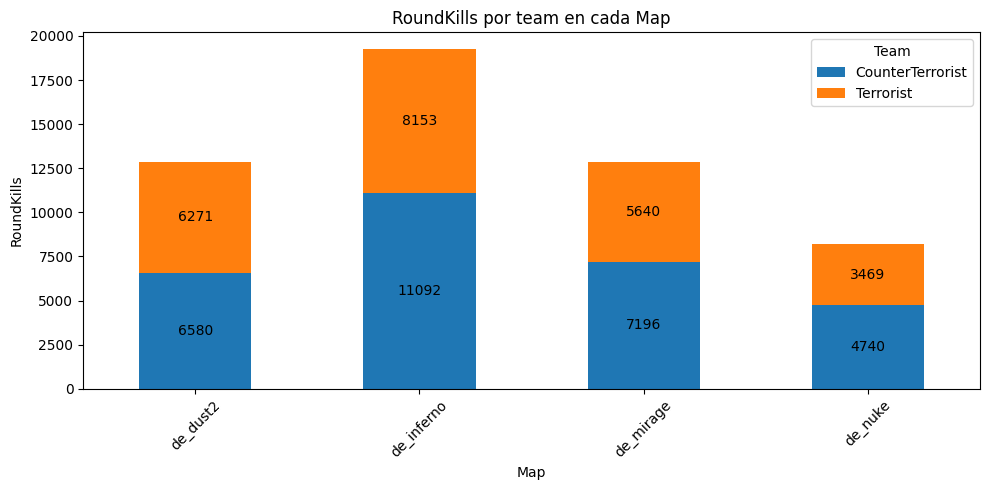

In [ ]:
# A
df_map_team_kills = df.groupby(['Map', 'Team'])['RoundKills'].sum().unstack()

ax = df_map_team_kills.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('RoundKills por team en cada Map')
plt.ylabel('RoundKills')
plt.xlabel('Map')
plt.xticks(rotation=45)
plt.legend(title='Team')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')

plt.tight_layout()
plt.show()

In [ ]:
# Tabla resumen del gráfico anterior, con una columna adicional con la diferencia entre bandos
df_map_team_kills['Diferencia'] = df_map_team_kills['CounterTerrorist'] - df_map_team_kills['Terrorist']

df_map_team_kills

Team,CounterTerrorist,Terrorist,Diferencia
Map,,,
de_dust2,6580,6271,309
de_inferno,11092,8153,2939
de_mirage,7196,5640,1556
de_nuke,4740,3469,1271


***El gráfico y la tabla anteriores reflejan una mayor cantidad de puntajes por muerte en el equipo ContraTerrorista, en todos los mapas. Frente a ello, surgen las siguientes suposiciones, las que pueden ser complementarias o excluyentes entre sí:***
* Todos los mapas están diseñados de tal manera que el bando ContraTerrorista efectúe más muertes que el otro.
* Las condiciones de victoria de cada bando condicionan el recuento de 'RoundKills' de cada equipo, ya que el equipo Terrorista, para ganar, se enfoca en plantar la bomba y, el ContraTerrorista, en eliminar al equipo contrario.
* Todos los mapas favorecen al bando ContraTerrorista por sobre al bando Terrorista.
---

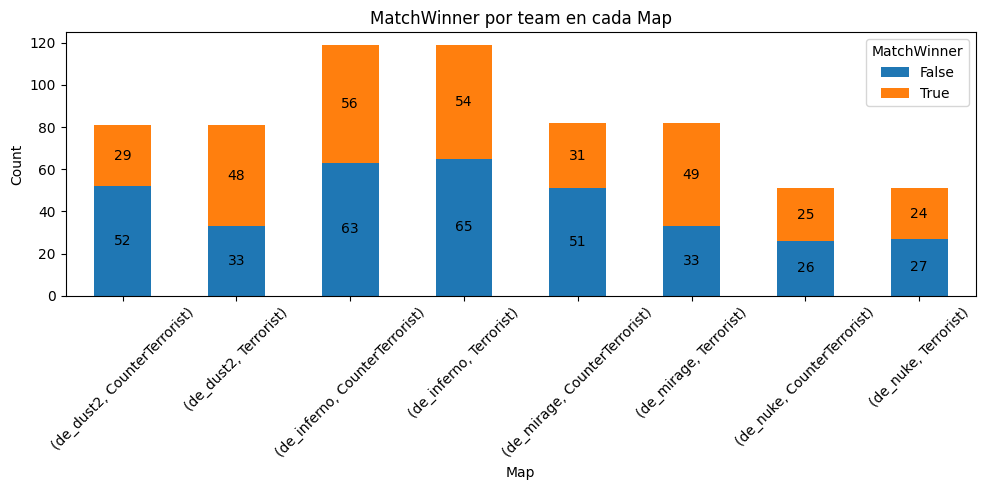

In [ ]:
# B
df_map_team_match_winner = df.groupby(['Map', 'Team', 'MatchId'])['MatchWinner'].unique().apply(lambda x: x[0]).reset_index()
df_map_team_match_winner = df_map_team_match_winner.groupby(['Map', 'Team'])['MatchWinner'].value_counts().unstack().fillna(0)

ax = df_map_team_match_winner.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('MatchWinner por team en cada Map')
plt.ylabel('Count')
plt.xlabel('Map')
plt.xticks(rotation=45)
plt.legend(title='MatchWinner')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')

plt.tight_layout()
plt.show()

In [ ]:
# Tabla resumen del gráfico anterior
df_map_team_match_winner

MatchWinner                  False  True 
Map        Team                          
de_dust2   CounterTerrorist     52     29
           Terrorist            33     48
de_inferno CounterTerrorist     63     56
           Terrorist            65     54
de_mirage  CounterTerrorist     51     31
           Terrorist            33     49
de_nuke    CounterTerrorist     26     25
           Terrorist            27     24

***Según el gráfico y la tabla anteriores:***
* **de_dust2**: El bando Terrorista lleva la delantera con creces, con 48 partidas ganadas versus 29 del ContraTerrorista. 4 partidas empatadas.**
* **de_inferno**: El bando ContraTerrorista supera por 2 al Terrorista, con 56 y 54 partidas ganadas, respectivamente. 9 empates.
* **de_mirage**: Con 49 partidas ganadas por parte de los Terroristas y 31 de los ContraTerroristas, el primero supera por mucho al segundo. 2 empates
* **de_nuke**: Los ContraTerroristas superan por 1 a los Terroristas, con 25 y 25 partidas ganadas, respectivamente. 2 empates.

** La cantidad de partidas empatadas se obtiene de la diferencia entre la cantidad de valores False de un bando y la cantidad de valores True del otro, en cada mapa.

---

#### Análisis conjunto entre 'RoundKills' y 'MatchWinner'

***Si comparamos ambos resultados, estamos en la posición de poder descartar el tercer punto de la lista de suposiciones que anteceden a ambos gráficos, que reza que "todos los mapas favorecen al bando ContraTerrorista por sobre al bando Terrorista". Esto ya que, a pesar que el primero registra una mayor cantidad de puntos por muertes que el segundo en todos los mapas, el panorama de partidas ganadas es diferente: la cifra es casi igual en los mapas de_inferno y de_nuke, pero los terroristas han obtenido una considerablemente mayor en de_dust2 y de_mirage.***

---

**Campo identificador de cada ronda**

La naturaleza del Dataset, en base a cómo se distribuyen las rondas en cada partida, no permite agrupar los datos de cada ronda e identificarlos con un único campo identificador, porque RoundId es un campo autoincremental que se reinicia para cada identificador de partida (MatchId).

Por lo mismo, en la siguiente fase se creará un nuevo campo que identifique cada ronda con un identificador que concatene el valor correspondiente al Id de la partida ('MatchId') con el de la ronda ('RoundId').

---

**La creación del campo mencionado se hará en la siguiente fase, correspondiente a la preparación de datos**

---

### Estadísticas

En cuanto a las estadísticas generales, considerando el desempeño de todos los jugadores a lo largo de todas las partidas registradas, tenemos lo siguiente:

In [ ]:
# Resumen de estadísticas numéricas, con campo como fila y estadístico como columna
df_numericos.describe().T

,count,mean,std,min,25%,50%,75%,max
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0
RoundHeadshots,79157.0,0.301553,0.578843,0.0,0.0,0.0,0.0,5.0
RoundFlankKills,79157.0,0.095633,0.320641,0.0,0.0,0.0,0.0,5.0
RoundStartingEquipmentValue,79157.0,3778.108695,2111.285406,0.0,1600.0,4700.0,5200.0,8850.0
TeamStartingEquipmentValue,79157.0,18890.133532,9743.203024,0.0,10900.0,22550.0,26050.0,36150.0
MatchKills,79157.0,8.511578,6.195079,0.0,3.0,8.0,13.0,41.0
MatchFlankKills,79157.0,1.209912,1.435150,0.0,0.0,1.0,2.0,11.0


#### Estadísticos

*   **count**: El número de observaciones no nulas en la columna.
*   **mean**: El valor promedio de la columna.
*   **std**: La desviación estándar de la columna.
*   **min**: El valor mínimo en la columna.
*   **25%**: El percentil 25 (primer cuartil) de la columna.
*   **50%**: El percentil 50 (mediana) de la columna.
*   **75%**: El percentil 75 (tercer cuartil) de la columna.
*   **max**: El valor máximo en la columna.

Primero que nada, y tal como se puede observar, no se visualizan los resultados de los campos 'TimeAlive', 'TravelledDistance' y 'FirstKillTime', ya que aún no se les redefine el cambio de tipo de dato a numérico. Sin embargo, a estas alturas no nos interesan sus resultados.

***En cada ronda:***
* El 75% de los jugadores lanzan a lo más una granada letal y a lo más dos granadas no letales. Eso sí, están aquellos que alcanzan a lanzar 4 letales y/o 6 no letales. La desviación estándar de ambos campos es medianamente alta, por lo que hay una porción importante de jugadores cuyos resultados se alejan bastante de la media.
* Los jugadores, en promedio, efectúan menos de una muerte, y el 75% a lo más efectúa una. Menos aún realizan asistencias de muerte. Eso sí, hay algunos que alcanzan a realizar hasta 5 muertes y/o 4 asistencias. La desviación estándar es medianamente alta en muertes por ronda, por lo que hay algunos jugadores que destacan sobre la media.
* Sobre el modo de efectuar una muerte, ni siquiera el 75% de los jugadores alcanza a ejecutar un tiro en la cabeza (Headshot) ni tampoco una muerte por el flanco (FlanKill). Aquí la desviación estandar es medianamente baja.

---

***En cada partida:***
* Los jugadores, en promedio, efectúan 8 a 9 muertes y 1 a 2 asistencias. Sin embargo, la desviación estándar es súmamente alta en el primero de los casos: el 75% de los jugadores a lo más realizan 13 muertes, pero el resto alcanza a llegar incluso a las 41. También es alta en las asistencias, aunque mucho menor, con un 75% de jugadores que a lo más alcanza a realizar 3 y el resto a los más 14.
* El fenómeno anterior también se ve reflejado en los tipos de muerte, en que, en promedio, se logra una asistencia por el flanco y de 3 a 4 por tiro en la cabeza, con una desviación estándar elevada para ambos casos: en asistencia, el 75% a lo más alcanza a ejecutar 2 muertes por el flanco, y el resto hasta 11, y el 75% ejecuta a lo más 6 tiros en la cabeza, y el resto hasta 22.

---

***Equipamiento y uso de armas por ronda:***
* En el inicio de cada ronda, el valor del equipamiento llevado por el jugador varía desde 0 hasta 8850; y, en total por equipo, desde 0 hasta 36150.
* Las armas más empleadas son las de tipo Assault Rifle.

---

***Es importante tener en cuenta que, para el cálculo de los estadísticos, se utilizan todos los registros de partida. Esto quiere decir que el desempeño de cada jugador puede variar entre rondas, y un mismo jugador puede o no estar presente en más de una partida dentro del conjunto de datos.***

---

**Moda**

Para obtener la moda, es decir, el valor con mayor frecuencia en determinados campos, podemos ejecutar las siguientes líneas de código.

In [ ]:
# Cálculo de moda por cada columna con datos de tipo categórico
moda_nominales = df_nominales.mode().iloc[0]

# Tabla con los resultados
pd.DataFrame({'Columna': moda_nominales.index, 'Moda': moda_nominales.values})

,Columna,Moda
0,Map,de_inferno
1,Team,Terrorist
2,InternalTeamId,2
3,RoundWinner,False
4,MatchWinner,False
5,Survived,False


***La tabla anterior nos muestra el valor más frecuente dentro de cada campo categórico, teniendo en cuenta todos los registros del Dataset:***
* El mapa más jugado es de_inferno.
* En los registros de usuarios por ronda, la mayoría de los jugadores es parte del equipo terrorista.
* La mayoría de los equipos pierde una partida.
* La mayoría de los jugadores no logra sobrevivir para el término de cada ronda.

---

Para el cálculo de moda en los campos numéricos discretos, tenemos el siguiente resultado

In [ ]:
# Cálculo de moda por columnas con valores numéricos discretos
moda_discretos = df_discretos.mode().iloc[0]

# Tabla con los resultados
pd.DataFrame({'Columna': moda_discretos.index, 'Moda': moda_discretos.values})

,Columna,Moda
0,RLethalGrenadesThrown,0
1,RNonLethalGrenadesThrown,0
2,RoundKills,0
3,RoundAssists,0
4,RoundHeadshots,0
5,RoundFlankKills,0
6,RoundStartingEquipmentValue,4700
7,TeamStartingEquipmentValue,23500
8,MatchKills,2
9,MatchFlankKills,0


***La tabla anterior nos muestra el valor más frecuente dentro de cada campo numérico discreto, teniendo en cuenta todos los registros del Dataset:***
* En todos los campos que reflejan resultados por ronda, en la mayoría de los casos no se consigue ni siquiera lanzar una granada letal o no letal, ni efectuar muertes ni asistencias.
* En cambio, en la mayoría de las partidas, un jugador logra efectuar 2 muertes y 1 tiro en la cabeza.
* Por último, en la mayoría de las rondas el valor del equipamiento individual es de 4700, y el total del valor de equipamiento por equipo es de 23500.

---

**Outliers**

Para finalizar con el análisis exploratorio del conjunto de datos, se despliegan Diagramas de Cajas para los campos numéricos discretos, debido a los valores elevados de la desviación estándar que se pudo observar en la tabla de estadísticos. Lo anterior, con el motivo de detectar los valores atípicos que pudieran estar afectando el resultado de cada estadístico.

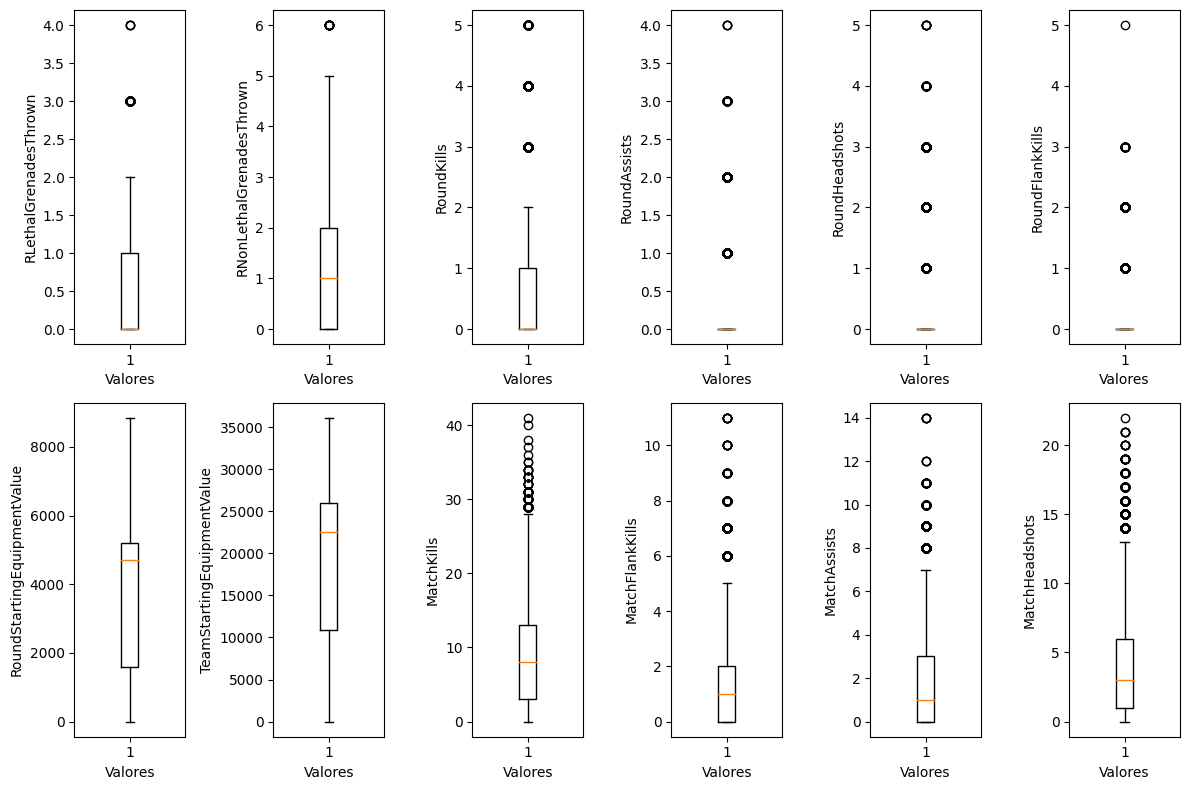

In [ ]:
# Detectar valores atípicos (outliers) en los campos numéricos discretos, a través de Diagramas de Cajas
fig, axs = plt.subplots(2, len(df_discretos.columns) // 2, figsize=(12, 8))

for i, columna in enumerate(df_discretos.columns):
    row, col = divmod(i, len(df_discretos.columns) // 2)
    axs[row, col].boxplot(df_discretos[columna])
    axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel(columna)

plt.tight_layout()
plt.show()

**Análisis de los Diagramas de Cajas**

***Los diagramas podemos dividirlos en cuatro grupos:***
* **Uso de granadas:**
Hay unos pocos jugadores que lanzan más granadas letales y no letales que el resto de jugadores.

* **Valor de equipamiento:**
No hay valores atípicos, porque valor de equipamiento por jugador y por equipo es relativamente igual en casi todas las partidas.

* **Kills por ronda:**
La mayoría de los jugadores no logra realizar una muerte o asistencia durante una ronda.

* **Kills por partida:**
Generalmente, los jugadores logran realizar hasta algo más de 10 muertes, dos asistencias y 5 tiros a la cabeza por partida, y no más de 2 muertes por el flanco. Sin embargo, hay unos pocos jugadores que destacan por sobre la mayoría y que superan con creces estos resultados.


---

Además de estos cuatro grupos, se podría mencionar un quinto, que manifiesta un fenómeno bien particular dentro del conjunto de datos. Éste es el conformado por los campos 'RoundAssists', 'RoundHeadshots' y 'RoundFlankKills', los que en su gráfico de cajas no presentan el rango intercuartil entre el primer cuartil y el tercero, lo que se evidencia por la falta de la caja. Esto ocurre porque el primer cuartil (Q1), la mediana (Q2) y el tercer cuartil (Q3) son del mismo valor, es decir, 0. Todos los valores por sobre el tercer cuartil son considerados como outliers.

Observemos la distribución de los valores para cada uno de estos campos:

In [ ]:
# Los campos de interés
campos_especificos = ['RoundAssists', 'RoundHeadshots', 'RoundFlankKills']

# Crear un diccionario para almacenar los conteos
conteos = {columna: {i: 0 for i in range(6)} for columna in campos_especificos}

# Contar los valores 0, 1, 2, 3, 4 y 5 en cada columna
for columna in campos_especificos:
    value_counts = df[columna].value_counts()
    for valor in range(6):
        conteos[columna][valor] = value_counts.get(valor, 0)

# Mostrar los resultados
for columna, counts in conteos.items():
    print(f"Conteos en {columna}:")
    for valor, count in counts.items():
        print(f"Valor {valor}: {count}")
    print()

Conteos en RoundAssists:
Valor 0: 68465
Valor 1: 9876
Valor 2: 756
Valor 3: 57
Valor 4: 3
Valor 5: 0

Conteos en RoundHeadshots:
Valor 0: 59575
Valor 1: 15875
Valor 2: 3177
Valor 3: 484
Valor 4: 41
Valor 5: 5

Conteos en RoundFlankKills:
Valor 0: 72195
Valor 1: 6389
Valor 2: 540
Valor 3: 32
Valor 4: 0
Valor 5: 1



Y ahora obtengamos las medidas de tendencia central de cada uno de dichos campos:

In [ ]:
campos_especificos = ['RoundAssists', 'RoundHeadshots', 'RoundFlankKills']

# Calcular la media, mediana y moda para cada campo específico
medidas_tendencia_central = {}
for columna in campos_especificos:
    media = round(df_discretos[columna].mean(), 2)
    mediana = round(df_discretos[columna].median(), 2)
    moda = df_discretos[columna].mode().iloc[0]
    moda = round(moda, 2)

    medidas_tendencia_central[columna] = {'Media': media, 'Mediana': mediana, 'Moda': moda}

# Crear un DataFrame a partir de los resultados
df_medidas_tendencia_central = pd.DataFrame(medidas_tendencia_central)

df_medidas_tendencia_central

,RoundAssists,RoundHeadshots,RoundFlankKills
Media,0.15,0.3,0.1
Mediana,0.00,0.0,0.0
Moda,0.00,0.0,0.0


Se tomarán en cuenta estos resultados en el tratamiento específico de los outliers de estos campos.

---

**Registros con valores atípicos (outliers)**

Los outliers pueden influir negativamente en el rendimiento de los modelos, por lo que, a continuación, se identificarán los registros con valores atípicos y se creará una variable para almacenarlos y tratarlos de manera aislada. Posteriormente, en la siguiente fase, se integrarán las modificaciones en el DataFrame.

In [ ]:
# Crear un DataFrame para almacenar los registros con outliers
outliers = pd.DataFrame()

# Iterar sobre las columnas
for columna in df_discretos.columns:
    # Calcular los cuartiles 1 y 3
    q1 = df_discretos[columna].quantile(0.25)
    q3 = df_discretos[columna].quantile(0.75)

    # Calcular el rango intercuartílico
    iqr = q3 - q1

    # Calcular los límites inferior y superior
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Detectar los valores atípicos
    outliers[columna] = df_discretos[(df_discretos[columna] < lower_bound) | (df_discretos[columna] > upper_bound)][columna]

outliers

,RLethalGrenadesThrown,RNonLethalGrenadesThrown,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
106,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,3,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75156,3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
76580,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76797,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77734,3,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La tabla anterior, adaptada para mostrar únicamente las primeras y últimas 5 filas, nos indica que hay 98 registros con valores atípicos (en diferentes campos).


Por lo tanto, a continuación se crea una copia del DataFrame con los campos discretos, para poder tratar los outliers.

Además:
* Para el caso de los outliers en los campos 'RoundAssists', 'RoundHeadshots' y 'RoundFlankKills', se reemplazarán por el valor 1, ya que todas las medidas de tendencia central y el tercer cuartil dan como resultado 0 (valor redondeado o no). De esa forma, se reduce el impacto de los valores extremos y facilita la interpretación, en el sentido de que se puede contabilizar la cantidad de asistencias, tiros en la cabeza y muertes por el flanco que se realizan en cada ronda.

* Para el resto de campos, se decide reemplazar los valores atípicos con la mediana de cada columna, ya que es una opción segura cuando se trata de outliers, especialmente cuando éstos son extremos. La mediana proporciona una representación más robusta del centro de los datos sin ser influenciada por los valores extremos.

In [ ]:
# Separar los campos específicos y el resto de los campos
campos_especificos = ['RoundAssists', 'RoundHeadshots', 'RoundFlankKills']
otros_campos = [col for col in df_discretos.columns if col not in campos_especificos]

# Copiar el DataFrame para los cambios
df_outliers_tratados = df_discretos.copy()

# Reemplazar outliers en los campos específicos con 1
for columna in campos_especificos:
    q1 = df_discretos[columna].quantile(0.25)
    q3 = df_discretos[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_outliers_tratados[columna] = df_discretos[columna].apply(
        lambda x: 1 if x < lower_bound or x > upper_bound else x
    )

# Reemplazar outliers en los otros campos con la mediana
for columna in otros_campos:
    q1 = df_discretos[columna].quantile(0.25)
    q3 = df_discretos[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_outliers_tratados[columna] = df_discretos[columna].apply(
        lambda x: df_discretos[columna].median() if x < lower_bound or x > upper_bound else x
    )

df_sin_atipicos = df_outliers_tratados.astype(int)

df_sin_atipicos

,RLethalGrenadesThrown,RNonLethalGrenadesThrown,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,0,4,0,0,0,0,750,4400,0,0,0,0
1,0,0,0,0,0,0,800,4400,0,0,0,0
2,0,0,0,0,0,0,1000,4400,0,0,0,0
3,0,0,0,0,0,0,850,4400,0,0,0,0
4,1,1,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79152,1,1,0,0,0,0,5600,27100,4,0,2,2
79153,0,0,1,0,1,0,5500,27100,8,5,1,3
79154,1,1,0,0,0,0,4950,27100,5,0,2,3
79155,0,2,0,0,0,0,4950,27100,1,0,1,0


Por último, y tras haber realizado los cambios, visualizamos una vez más los diagramas de cajas.

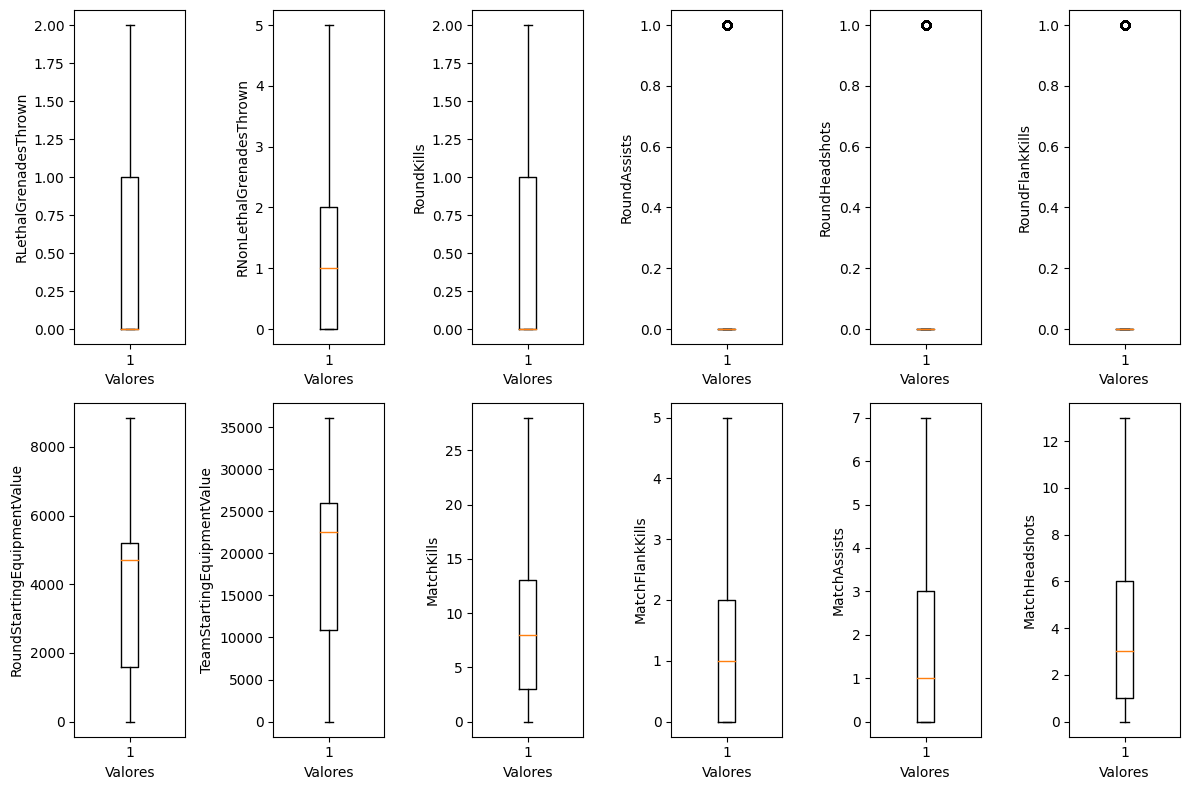

In [ ]:
# Visualizar nuevamente los diagramas de cajas
fig, axs = plt.subplots(2, len(df_outliers_tratados.columns) // 2, figsize=(12, 8))

for i, columna in enumerate(df_outliers_tratados.columns):
    row, col = divmod(i, len(df_outliers_tratados.columns) // 2)
    axs[row, col].boxplot(df_outliers_tratados[columna])
    axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel(columna)

plt.tight_layout()
plt.show()

Tal como se observa, en todos los campos discretos ya no hay outliers, exceptuando los tres que aíslamos anteriormente. En otras palabras, si bien no se eliminaron todos los outliers del DataFrame, sí son tratados debidamente para mejorar la interpretación de los datos e incrementar la robustez de los modelos.

---

**La modificación definitiva de los valores atípicos se hará en la siguiente fase, correspondiente a la preparación de datos**

---

## Fase 3: Data Preparation

Antes de efectuar las modificaciones al DataFrame, se hace una copia del mismo. Sobre esta nueva copia se efectuarán las modificaciones pertinentes y es la que se empleará para la fase de modelamiento.

In [ ]:
# Hacer una copia del DataFrame y asignarlo a una nueva variable
df2 = df.copy()

---

###**Tratamiento de outliers (referida en la fase anterior)**

---

In [ ]:
# Integrar los registros modificados en el DataFrame
df2.update(df_outliers_tratados)

---

###**Imputación de datos (referida en la fase anterior)**

---

In [ ]:
# Aplicar los cambios mencionados anteriormente en la nueva copia del DataFrame
df2.loc[[13, 27], 'Team'] = ['Terrorist', 'CounterTerrorist']
df2.loc[[29], 'RoundWinner'] = ['False']
df2.loc[[29], 'MatchWinner'] = ['False']

In [ ]:
# Redefinición de tipo de dato para los campos problemáticos mencionados en las fases anteriores
df2['RoundWinner'] = df2['RoundWinner'].astype(bool)
df2['MatchWinner'] = df2['MatchWinner'].astype(bool)

In [ ]:
# Comprobar que no hayan valores nulos en el nuevo DataFrame
df2[df2.isnull().any(axis=1)]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots


---

### **Redefinición de tipo de dato para determinados campos (referida en la fase anterior)**

---

* 'RoundWinner', 'MatchWinner' y 'Survived'

In [ ]:
# Redefinición de campos de tipo booleano a entero, para facilitar su uso como datos de tipo categórico nominal
df2['RoundWinner'] = df2['RoundWinner'].astype(int)
df2['MatchWinner'] = df2['MatchWinner'].astype(int)
df2['Survived'] = df2['Survived'].astype(int)

* 'TimeAlive', 'TravelledDistance' y 'FirstKillTime'

In [ ]:
# Consultamos los valores de los tres campos restantes, con cuatro registros aleatorios de ejemplo
df2[['TimeAlive', 'TravelledDistance', 'FirstKillTime']].sample(4)

,TimeAlive,TravelledDistance,FirstKillTime
41137,9.218.854.423.794.480,11.306.484.453.072.300,8.398.984
14697,28.666.001.343.187.000,3.805.633.900.850.030,4.337.454
28294,5.758.157.080.483.700,13.366.779.596.415.400,5.758.156.999.999.990
1430,3.410.083.131.852.210,30.554.484.939.521.200,324.740.028


Como podemos observar, claramente los tres campos son de tipo numérico. Según la descripción inicial del caso para dos de ellos, 'TimeAlive' y 'TravelledDistance' miden, respectivamente, el tiempo en segundos que el jugador estuvo vivo durante el juego y la distancia viajada por el jugador durante la partida (en la descripción se menciona una partida, pero más bien es durante una ronda).

Y debemos suponer que el tercer campo, 'FirstKillTime' mide el tiempo, en segundos, que transcurre antes de que el jugador haya efectuado una muerte en una ronda.

Por consiguiente, y debido a la gran cantidad de dígitos que poseen algunos valores de estos campos en el conjunto de datos, se procederá a redefinir el tipo de campo a flotante, con su parte entera antes del primer punto y la parte decimal a la derecha del mismo.

In [ ]:
def convertir_a_float(valor):
    try:
        # Reemplazar comas con puntos para manejar notación científica y formatos decimales
        valor = valor.replace(',', '.')
        # Intentar convertir directamente a flotante para manejar notación científica
        return float(valor)
    except ValueError:
        partes = valor.split('.')
        parte_entera = partes[0]
        parte_decimal = ''.join(partes[1:])

        # Unir la parte entera y decimal, y convertir a flotante
        return float(f"{parte_entera}.{parte_decimal}")

In [ ]:
# Aplicar la función a los campos 'TimeAlive', 'TravelledDistance' y 'FirstKillTime'
df2['TimeAlive'] = df2['TimeAlive'].apply(convertir_a_float)
df2['TravelledDistance'] = df2['TravelledDistance'].apply(convertir_a_float)
df2['FirstKillTime'] = df2['FirstKillTime'].apply(convertir_a_float)

In [ ]:
# Consultamos nuevamente los valores de los tres campos, con cuatro registros aleatorios de ejemplo
df2[['TimeAlive', 'TravelledDistance', 'FirstKillTime']].sample(4, random_state=42)

,TimeAlive,TravelledDistance,FirstKillTime
11762,8.016067,20.456823,285.126858
31836,54.505894,4.227065,3.856667
3607,5.141787,111.136891,6.880737
65769,43.343037,8.064242,494.723549


Pese al enfoque aplicado anteriormente, aún queda en incógnita la unidad de medida del campo 'TravelledDistance'.

Además, si observamos el ejemplo de algunos registros y nos guiamos por la idea de que los campos 'TimeAlive' y 'FirstKillTime' se miden en segundos y es un valor por ronda, hay algunos casos en que el tiempo en que un jugador efectúa su primera muerte es mayor al tiempo que logra sobrevivir, lo que es sumamente ilógico. Es decir, si seguimos ese enfoque, los datos resultan ser incongruentes.

Por consiguiente, lo anterior y el hecho de que no hay modo de tratar esos campos de manera clara y precisa, son motivos suficientes para omitir esos campos en el DataFrame.

---

### **Eliminación de los campos innecesarios (referida en la fase anterior)**

---

In [ ]:
# El campo 'Unnamed: 0' no aporta nada al estudio y 'AbnormalMatch' posee el mismo resultado para todos los registros, por lo que se eliminan
df2 = df2.drop(['Unnamed: 0', 'AbnormalMatch'], axis = 1)

# También se eliminan los campos 'TimeAlive', 'TravelledDistance' y 'FirstKillTime' por las razones expuestas en el párrafo anterior
df2 = df2.drop(['TimeAlive', 'TravelledDistance', 'FirstKillTime'], axis = 1)


---

### **Creación de un nuevo campo (referida en la fase anterior)**

---

Para identificar cada ronda de manera individual dentro del DataFrame, se crea un nuevo campo que concatena el identificador de la partida con el de la ronda.

In [ ]:
# Crear la columna MatchRoundId
df2['MatchRoundId'] = df2['MatchId'].astype(str) + '_' + df2['RoundId'].astype(str)

# Ubicar la columna MatchRoundId después de la columna RoundId
column_index = df2.columns.get_loc('RoundId') + 1
df2.insert(column_index, 'MatchRoundId', df2.pop('MatchRoundId'))

---

### **DataFrame definitivo**

In [ ]:
# Visualizamos los primeros y últimos 5 registros del DataFrame definitivo
df2

,Map,Team,InternalTeamId,MatchId,RoundId,MatchRoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,4_1,1,1,0,0,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,4_1,1,1,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,4_1,1,1,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,4_1,1,1,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,4_1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,511_5,0,0,0,1,...,0,0,0,0,5600,27100,4,0,2,2
79153,de_mirage,CounterTerrorist,2,511,5,511_5,0,0,0,0,...,1,0,1,0,5500,27100,8,5,1,3
79154,de_mirage,CounterTerrorist,2,511,5,511_5,0,0,0,1,...,0,0,0,0,4950,27100,5,0,2,3
79155,de_mirage,CounterTerrorist,2,511,5,511_5,0,0,0,0,...,0,0,0,0,4950,27100,1,0,1,0


---

#### **Conjuntos de campos para DataFrame definitivo**

Al igual que en la fase anterior, se vuelve a crear una variable para cada conjunto de campos que comparten un tipo de dato en particular, de modo de asegurar que se emplean los mismos campos pero actualizados, en relación al DataFrame definitivo de desarrollo del modelo de Machine Learning.

In [ ]:
# Asignar una variable todos los conjuntos del Dataframe utilizado para la preparación de datos y el modelamiento
df2_ordinales = df2[['MatchId', 'RoundId', 'MatchRoundId']]
df2_nominales = df2[['Map', 'Team', 'InternalTeamId', 'RoundWinner', 'MatchWinner', 'Survived']]
df2_discretos = df2[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']]
df2_continuos = df2[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']]
df2_categoricos = df2[['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchRoundId', 'RoundWinner', 'MatchWinner', 'Survived']]
df2_numericos = df2[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']]

---

Después de la preparación del DataFrame, estamos en posición de establecer y visualizar algunas relaciones más entre sus distintos campos.

---


### Correlación

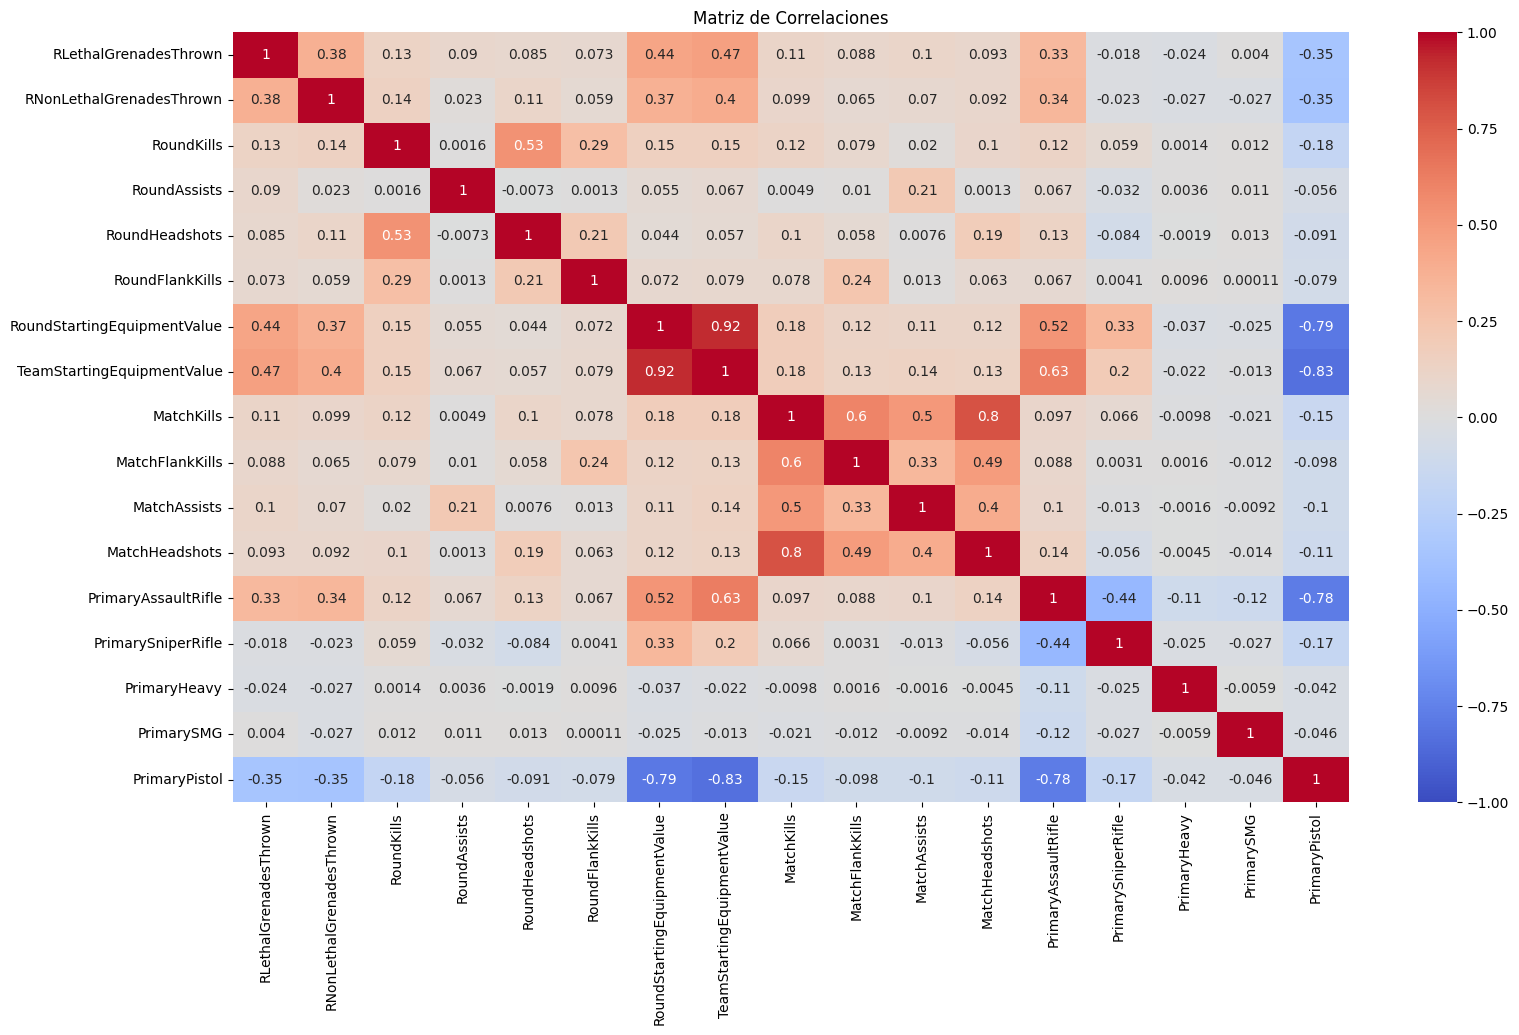

In [ ]:
# Correlación por pares de todas las columnas numéricas
matriz_correlacion = df2_numericos.corr()

plt.figure(figsize=(18, 10))
sb.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones')
plt.show()

#### **Coeficiente de correlación**

Los valores oscilan entre -1.0 y 1.0, que son el resultado del coeficiente de correlación. Un valor de +1 indica una correlación perfecta positiva, un valor de -1 indica una correlación perfecta negativa, y un valor de 0 indica que no hay correlación. Los valores entre 0 y ±1 indican el grado de correlación: cuanto más cerca estén de ±1, más fuerte será la correlación.

***Si observamos la tabla de correlación entre los distintos campos, podemos constatar que no hay ninguna correlación perfecta positiva ni negativa y, más aún, que hay pocas correlaciones fuertes en general.***

***Sin embargo, podemos señalar las siguientes correlaciones:***
* Correlación más fuerte entre 'MatchKills' y 'MatchHeadshots' (0.83), aunque esto es sumamente lógico, porque el aumento del segundo también provoca el aumento del primero.

* Correlación fuerte entre 'RoundStartingEquipmentValue' y 'TeamStartingEquipmentValue', pero ésta también es esperable, ya que al aumentar el valor del equipo inicial por ronda, lo hace el del equipo inicial por partida.

* Correlación negativa ligeramente fuerte entre 'PrimaryPistol' y 'PrimaryAssaultRiffle', lo que nos puede llevar a pensar que la tendencia entre los jugadores es usar una de estas armas una cantidad de tiempo inversamente proporcional al uso de la otra.

* Correlación negativa fuerte entre 'PrimaryPistol' y 'RoundStartingEquipmentValue' y más aún entre el primer campo y 'TeamStartingEquipmentValue', ya que al aumentar el valor del equipamiento individual y el del total del equipo, menos se emplea la pistola como arma principal.

---
### **DataFrame para modelo predictivo**

Ahora bien, ya que terminamos de preparar los datos, debemos escoger los campos del DataFrame que permitan generar el modelo predictivo de Machine Learning. Luego de todo el análisis anterior, y retomando la hipótesis principal de que hay ciertos parámetros que aumentan la probabilidad de que un jugador sobreviva en una ronda, nos toca definir los campos que poseen una correlación más directa con la variable objetivo 'Survived'.


In [ ]:
# Tabla de correlación por pares que relaciona 'Survived' con el resto de los campos numéricos
df2_subset = df2[['Survived'] + list(df2_numericos.columns)]

# Calcular la matriz de correlación por pares
correlacion_survived = df2_subset.corr()

# Extraer los coeficientes de correlación entre 'Survived' y los otros campos
survived_correlacion = correlacion_survived['Survived']

survived_correlacion

Survived                       1.000000
RLethalGrenadesThrown          0.169204
RNonLethalGrenadesThrown       0.124824
RoundKills                     0.245444
RoundAssists                  -0.067776
RoundHeadshots                 0.192391
RoundFlankKills                0.138335
RoundStartingEquipmentValue    0.170578
TeamStartingEquipmentValue     0.173237
MatchKills                     0.059362
MatchFlankKills                0.044604
MatchAssists                  -0.005422
MatchHeadshots                 0.044612
PrimaryAssaultRifle            0.110008
PrimarySniperRifle             0.067100
PrimaryHeavy                   0.002006
PrimarySMG                     0.026469
PrimaryPistol                 -0.173705
Name: Survived, dtype: float64

### **Correlaciones más significativas con el campo 'Survived'**


Positivas:
* Survived - RoundKills:                  0.245444
* Survived - RoundHeadshots:              0.192391
* Survived - RoundStartingEquipmentValue: 0.170578
* Survived - TeamStartingEquipmentValue:  0.173237
* Survived - RLethalGrenadesThrown        0.169204
* Survived - RNonLethalGrenadesThrown     0.124824
* Survived - RoundFlankKills:             0.138335
* Survived - PrimaryAssaultRifle:         0.110008


Negativa:
* Survived - PrimaryPistol:               -0.173705

***Según la tabla de correlaciones entre el campo 'Survived' y el resto de campos numéricos, al parecer hay determinadas variables que aumentan en mayor medida la probabilidad de que un jugador sobreviva en una ronda.***

***Por lo menos, los que logran efectuar muertes, tiros en la cabeza, y usan granadas letales y no letales tienen más posibilidades de sobrevivir. También ayuda el hecho de equiparse con más equipamiento y ocupar SniperRifle como el arma primaria.***

***Por el contrario, con la pistola como arma primaria es menos probable sobrevivir.***

---

Antes de escoger definitavemente el conjunto de variables independientes para el entrenamiento y evaluación de los modelos de ML, vamos realizar algunas pruebas previas que permitan afinar más la precisión de los mismos.

In [ ]:
# Creación de conjuntos de evaluación pre-entrenamiento
x = df2[['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol']]
y = df2['Survived']

---

### **Escalar variables independientes**

Escalar las variables independientes con MinMaxScaler para transformar los valores de las variables numéricas a un rango específico, entre 0 y 1, como medida de normalización de los datos y para mejorar el rendimiento del modelo.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_names = x.columns

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Convertir de nuevo a DataFrame
x_scaled_df = pd.DataFrame(x_scaled, columns=column_names)

---

#### **Colinealidad entre variables independientes**

La colinealidad se refiere a la situación en la cual dos o más variables predictoras en un modelo de regresión están altamente correlacionadas entre sí.

En algunos casos la colinealidad puede reducir la precisión predictiva del modelo al introducir redundancias en las variables predictoras.

Por ello, analizaremos la correlación entre las variables independientes del conjunto de entrenamiento.

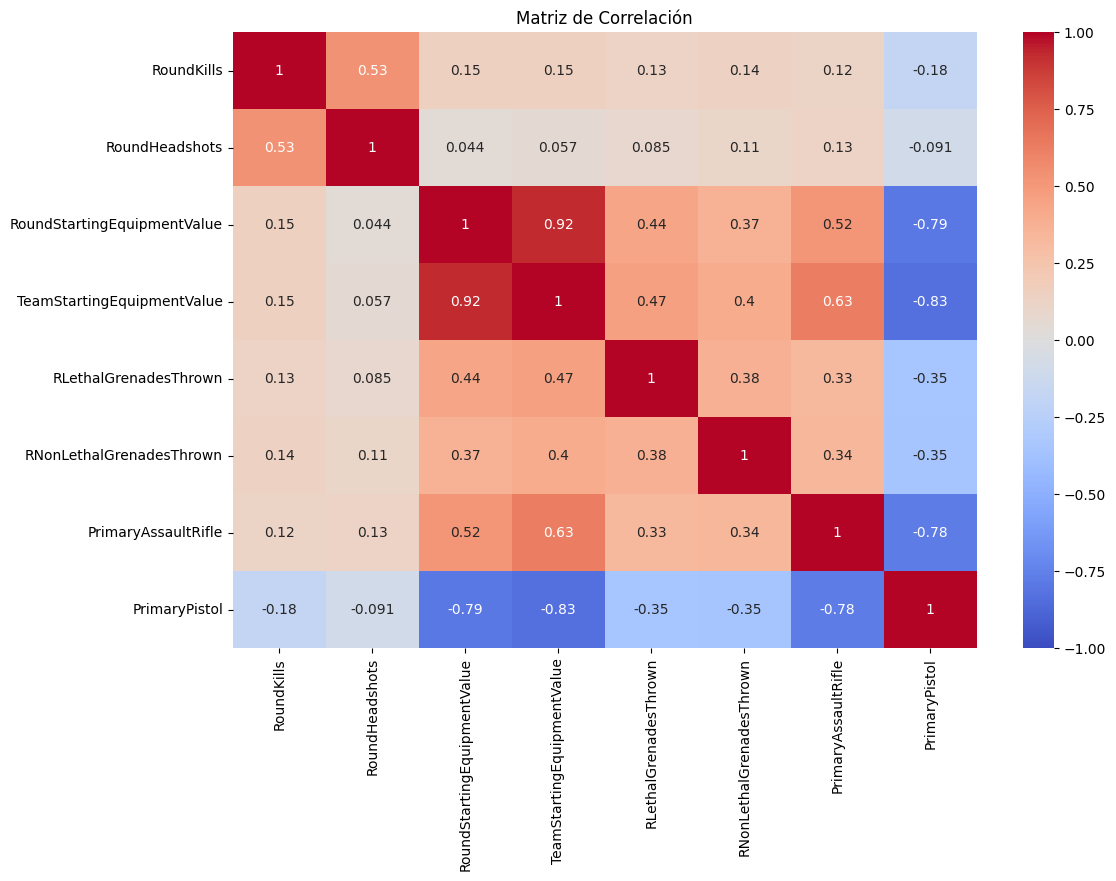

In [ ]:
correlation_matrix = x_scaled_df.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Algunas observaciones:
* RoundStartingEquipmentValue y TeamStartingEquipmentValue: 0.92
  * Esto sugiere una alta colinealidad entre estas dos variables.

* PrimaryPistol tiene una correlación negativa significativa con:
  * RoundStartingEquipmentValue: −0.79
  * TeamStartingEquipmentValue: −0.83
  * PrimaryAssaultRifle: −0.78

* RLethalGrenadesThrown y RNonLethalGrenadesThrown: 0.38
  * Aunque no es extremadamente alta, es algo a considerar.

---

Para cuantificar mejor la colinealidad, calcularemos el Factor de Inflación de la Varianza (VIF) para cada una de estas variables.

VIF es una medida que indica cuánto aumenta la varianza de un coeficiente de regresión debido a la colinealidad de una variable predictora con el resto, ayudando a detectar y mitigar problemas de multicolinealidad en modelos de regresión.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = x_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x_scaled_df.shape[1])]

vif_data

,Variable,VIF
0,RoundKills,2.238684
1,RoundHeadshots,1.889361
2,RoundStartingEquipmentValue,30.004054
3,TeamStartingEquipmentValue,40.093238
4,RLethalGrenadesThrown,2.299412
5,RNonLethalGrenadesThrown,2.750488
6,PrimaryAssaultRifle,5.733964
7,PrimaryPistol,1.099671


Las variables 'RoundStartingEquipmentValue' y 'TeamStartingEquipmentValue 'tienen VIFs extremadamente altos (por encima de 10 es generalmente una señal de preocupación).

Por consiguiente, se considera eliminar una de ellas del modelo para mejorar la interpretabilidad y estabilidad de los coeficientes. En este caso la segunda.

---

In [ ]:
# Separar variables independientes y variable dependiente
x = df2[['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol']]
y = df2['Survived']

In [ ]:
# Escalar nuevamente las variables independientes, esta vez para el entrenamiento y prueba de los modelos
column_names = x.columns

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=column_names)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos entre datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fase 4: Modeling

### Clasificación



#### Modelo de Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciar modelo de regresión logística
model_log = LogisticRegression()

# Entrenarlo con los conjuntos de entrenamiento
model_log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Predicción de las etiquetas de clase para los datos de prueba
y_pred_rl = model_log.predict(x_test)

---

#### Modelo de Árbol de Decisión

En el caso particular del modelo de Árbol de Decisión, se pasan, como variables independientes, todos los campos numéricos del DataFrame definitivo, de modo que el propio modelo defina los campos más adecuados para el entrenamiento y prueba.

In [ ]:
# Separar variables independientes y variable dependiente
x_tree = df2_numericos.copy()
y_tree = df2['Survived']

# Escalar variables independientes, para el entrenamiento y prueba del modelo de Árbol de Decisiones
tree_column_names = x_tree.columns
x_tree = scaler.fit_transform(x_tree)
x_tree = pd.DataFrame(x_tree, columns=tree_column_names)

# Dividir los datos entre datos de entrenamiento y de prueba
x_tree_train, x_tree_test, y_tree_train, y_tree_test = train_test_split(x_tree, y_tree, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar modelo
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Entrenar el clasificador
clf = clf.fit(x_tree_train, y_tree_train)

In [ ]:
# Predicción de las etiquetas de clase para los datos de prueba
y_pred_tree = clf.predict(x_tree_test)

In [ ]:
# El siguiente fragmento de código es para mostrar los campos más importantes seleccionados por el modelo para el entrenamiento y prueba
importances = clf.feature_importances_
tree_importances = pd.Series(importances, index=tree_column_names)

# Ordenar grados de importancia por valor
feat_imp = tree_importances.sort_values(ascending=False)

# Imprimir las 5 características principales
feat_imp.head(5)

RoundKills                     0.474206
RoundHeadshots                 0.343059
RoundStartingEquipmentValue    0.143772
RLethalGrenadesThrown          0.030554
RoundAssists                   0.008409
dtype: float64

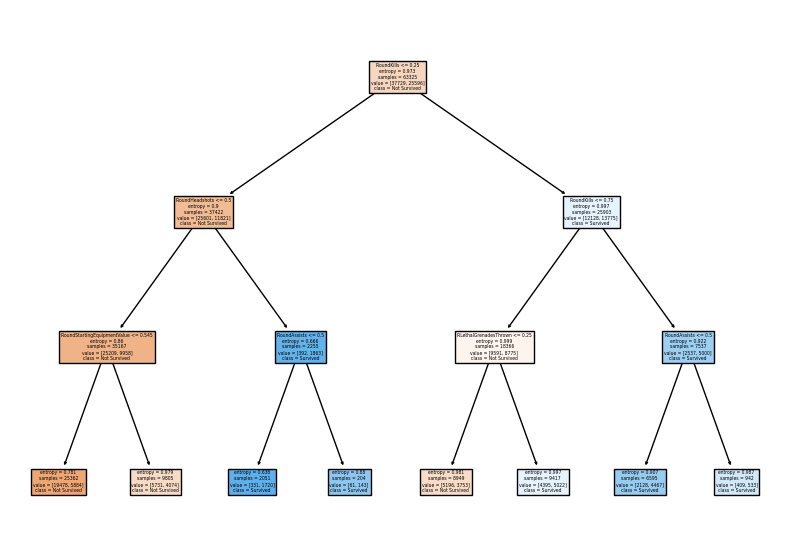

In [ ]:
# Visualizar árbol de decisión
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=x_tree.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Como se observa, el modelo tomó como campos principales cuatro de los ya seleccionados para los otros dos modelos ('RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'RLethalGrenadesThrown'), pero añade otro que no fue considerado para éstos ('RoundAssists').

---

#### Modelo SVC (Support Vector Classifier)

In [ ]:
from sklearn.svm import SVC

# Instanciar modelo
model_svc = SVC(kernel='linear', C=1.0)

# Entrenar el modelo
model_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predecir las etiquetas de clase para los datos de prueba
y_pred_svc = model_svc.predict(x_test)

### Regresión

In [ ]:
# NO APLICA

## Fase 5: Evaluation

### Evaluación del modelo de Regresión Logística

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calcular métricas de evaluación

# Exactitud
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print(f'Exactitud: {accuracy_rl:.2f}')

# Precisión
precision_rl = precision_score(y_test, y_pred_rl)
print(f'Precisión: {precision_rl:.2f}')

# Recall
recall_rl = recall_score(y_test, y_pred_rl)
print(f'Recall: {recall_rl:.2f}')

# F1-score
f1_rl = f1_score(y_test, y_pred_rl)
print(f'F1-score: {f1_rl:.2f}')

# Matriz de confusión
conf_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print('Matriz de confusión:')
print(conf_matrix_rl)

# Informe de clasificación
class_report_rl = classification_report(y_test, y_pred_rl)
print('Informe de clasificación:')
print(class_report_rl)


Exactitud: 0.65
Precisión: 0.59
Recall: 0.39
F1-score: 0.47
Matriz de confusión:
[[7785 1700]
 [3850 2497]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      9485
           1       0.59      0.39      0.47      6347

    accuracy                           0.65     15832
   macro avg       0.63      0.61      0.61     15832
weighted avg       0.64      0.65      0.63     15832



---

### Evaluación del modelo de Árbol de Decisión

In [ ]:
# Calcular métricas de evaluación

# Exactitud
accuracy_tree = accuracy_score(y_tree_test, y_pred_tree)
print(f'Exactitud: {accuracy_tree:.2f}')

# Precisión
precision_tree = precision_score(y_tree_test, y_pred_tree)
print(f'Precisión: {precision_tree:.2f}')

# Recall
recall_tree = recall_score(y_tree_test, y_pred_tree)
print(f'Recall: {recall_tree:.2f}')

# F1-score
f1_tree = f1_score(y_tree_test, y_pred_tree)
print(f'F1-score: {f1_tree:.2f}')

# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_tree_test, y_pred_tree)
print('Matriz de confusión:')
print(conf_matrix_tree)

# Informe de clasificación
class_report_tree = classification_report(y_tree_test, y_pred_tree)
print('Informe de clasificación:')
print(class_report_tree)

Exactitud: 0.67
Precisión: 0.62
Recall: 0.47
F1-score: 0.53
Matriz de confusión:
[[7629 1856]
 [3371 2976]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      9485
           1       0.62      0.47      0.53      6347

    accuracy                           0.67     15832
   macro avg       0.65      0.64      0.64     15832
weighted avg       0.66      0.67      0.66     15832



---

### Evaluación del modelo SVC

In [ ]:
# Calcular métricas de evaluación

# Exactitud
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Exactitud: {accuracy_svc:.2f}')

# Precisión
precision_svc = precision_score(y_test, y_pred_svc)
print(f'Precisión: {precision_svc:.2f}')

# Recall
recall_svc = recall_score(y_test, y_pred_svc)
print(f'Recall: {recall_svc:.2f}')

# F1-score
f1_svc = f1_score(y_test, y_pred_svc)
print(f'F1-score: {f1_svc:.2f}')

# Matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print('Matriz de confusión:')
print(conf_matrix_svc)

# Informe de clasificación
class_report_svc= classification_report(y_test, y_pred_svc)
print('Informe de clasificación:')
print(class_report_svc)

Exactitud: 0.63
Precisión: 0.56
Recall: 0.35
F1-score: 0.43
Matriz de confusión:
[[7746 1739]
 [4129 2218]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      9485
           1       0.56      0.35      0.43      6347

    accuracy                           0.63     15832
   macro avg       0.61      0.58      0.58     15832
weighted avg       0.62      0.63      0.61     15832



---

#### Significado de cada medida de evaluación:

##### Exactitud (Accuracy)

**Definición:** Es la proporción de predicciones correctas sobre el total de predicciones realizadas.

**Interpretación:** Una mayor exactitud indica que el modelo es capaz de predecir correctamente la clase de la mayoría de los ejemplos.

---

##### Precisión (Precision)

**Definición:** Es la proporción de verdaderos positivos sobre el total de predicciones positivas (verdaderos positivos + falsos positivos).

**Interpretación:** Alta precisión significa que el modelo tiene una baja tasa de falsos positivos. Es crucial cuando el costo de una falsa alarma es alto.

---

##### Recall (Sensibilidad)

**Definición:** Es la proporción de verdaderos positivos sobre el total de verdaderos casos (verdaderos positivos + falsos negativos).

**Interpretación:** Alto recall indica que el modelo tiene una baja tasa de falsos negativos. Es importante en situaciones donde es crucial capturar todos los casos positivos.

---

##### F1-score

**Definición:** Es la media armónica de la precisión y el recall. Proporciona un balance entre ambos, especialmente útil si hay un desbalance entre clases.

**Interpretación:** Un F1-score alto indica que el modelo tiene un buen balance entre precisión y recall.

---

### Comparación de los tres modelos

In [ ]:
models = ['Regresión Logística', 'Árbol de Decisión', 'SVC']
metrics = ['Exactitud', 'Precisión', 'Recall', 'F1-score']

data = [[accuracy_rl, precision_rl, recall_rl, f1_rl],
        [accuracy_tree, precision_tree, recall_tree, f1_tree],
        [accuracy_svc, precision_svc, recall_svc, f1_svc]]

df_comparacion = pd.DataFrame(data=data, index=models, columns=metrics)

print(df_comparacion.to_string())

                     Exactitud  Precisión    Recall  F1-score
Regresión Logística   0.649444   0.594949  0.393414  0.473634
Árbol de Decisión     0.669846   0.615894  0.468883  0.532427
SVC                   0.629358   0.560526  0.349456  0.430512


#### Análisis de Resultados:

* **Regresión Logística:** Tiene una exactitud razonable (0.649444) y buena precisión (0.594949), pero un recall bajo (0.393414), lo que sugiere que este modelo no está capturando bien los verdaderos positivos. Su F1-score (0.473634) indica un balance moderado entre precisión y recall.

* **Árbol de Decisión:** Este modelo presenta la mayor exactitud (0.669846) y la mejor precisión (0.615894). Además, tiene un recall superior (0.468883) comparado con los otros modelos, lo que indica que es mejor para capturar verdaderos positivos. Su F1-score (0.473634) es igual al de la regresión logística, mostrando un buen balance entre precisión y recall.

* **SVC:** Tiene la menor exactitud (0.629358) y precisión (0.560526). Su recall es también el más bajo (0.349456), lo que indica una alta tasa de falsos negativos. Su F1-score (0.430512) es el menor entre los tres modelos, indicando un menor balance entre precisión y recall.

---

### Análisis curva AP (Average Precision) o ROC (Receiver Operating Characteristic)

El modelo de Árbol de Decisión es el que posee mejores resultados. Pero, antes de entregar el veredicto, se analizará la curva AP o ROC de dicho modelo, dependiendo de si el Dataset está desbalanceado o no en el campo 'Survived', respectivamente.

Para ello, se observará la distribución de los valores en ese campo:
* 0: Jugador que no sobrevive en la ronda.
* 1: Jugador que sobrevive en la ronda.

In [ ]:
class_distribution = df2['Survived'].value_counts(normalize=True)
class_distribution

Survived
0    0.59646
1    0.40354
Name: proportion, dtype: float64

Como se observa, las clases están balanceadas, por lo que se aplicará la **curva ROC**.

La curva ROC muestra la relación entre la Tasa de Verdaderos Positivos (True Positive Rate) y la Tasa de Falsos Positivos (False Positive Rate).

---

#### Curva ROC de modelo de Árbol de Decisión

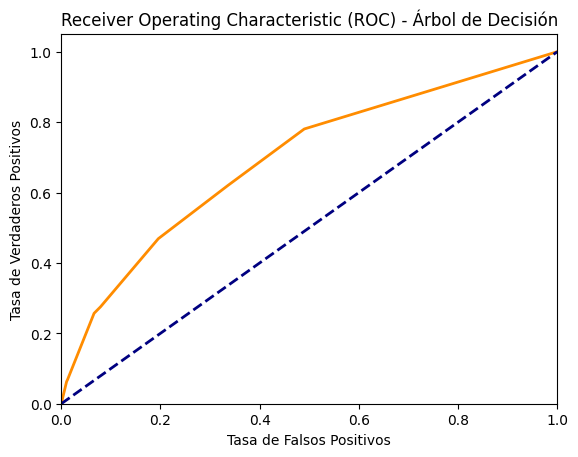

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predecir probabilidades
y_scores_tree = clf.predict_proba(x_tree_test)[:, 1]

# Calcular la curva ROC
fpr_tree, tpr_tree, _ = roc_curve(y_tree_test, y_scores_tree)
roc_auc_tree = roc_auc_score(y_tree_test, y_scores_tree)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc_tree:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) - Árbol de Decisión')
plt.show()


El resultado de la curva ROC para el modelo de Árbol de Decisión muestra un área bajo la curva (AUC) de 0.69. Esto indica que el modelo tiene una capacidad moderada para distinguir entre clases positivas y negativas.

---

### Elección del mejor modelo: **Árbol de Decisión**
Basado en los resultados anteriores, el Árbol de Decisión se presenta como el mejor modelo. Tiene la mayor exactitud, la mejor precisión y un recall superior comparado con los otros modelos. Esto significa que el Árbol de Decisión no solo predice correctamente la mayoría de los casos, sino que también captura una mayor proporción de verdaderos positivos, manteniendo un buen balance entre precisión y recall.

---

### **Observaciones**

Ajustar la precisión y la sensibilidad de un modelo puede hacerse a través de varias técnicas, incluyendo el ajuste de hiperparámetros, la modificación del umbral de decisión o el uso de técnicas de balanceo de datos.

Aunque aplicar dichas técnicas sobrepasa el alcance de este informe, a continuación se ofrecen algunas observaciones y recomendaciones para considerar en algún futuro mejoramiento del modelo.

Si el modelo fuera empleado para mejorar las tácticas de un equipo en partidas de CS:GO, sería beneficioso ajustar la precisión y la sensibilidad del modelo de Árbol de Decisión, tomando en cuenta la ley de compensación precisión/sensibilidad, que dicta que aumentar la precisión reduce la sensibilidad y viceversa:

* Si el costo de un falso positivo es alto (por ejemplo, si predecir incorrectamente que un jugador va a sobrevivir lleva a una estrategia que podría perjudicar al equipo), entonces se debe priorizar la precisión. Esto asegurará que cuando el modelo diga que un jugador va a sobrevivir, sea confiable.

* Si el costo de un falso negativo es alto (por ejemplo, si no predecir que un jugador va a sobrevivir lleva a decisiones que no aprovechan la ventaja de que el jugador sigue en el juego), entonces se debe priorizar la sensibilidad. Esto asegurará que se capturen la mayoría de los casos en los que el jugador realmente va a sobrevivir.

#### Recomendación
En el contexto de los juegos, donde la información y las estrategias en tiempo real son cruciales, sería más óptimo priorizar la sensibilidad, para asegurar que se identifiquen la mayoría de los jugadores que van a sobrevivir. Esto permite al equipo ajustar sus estrategias para maximizar sus ventajas. No obstante, esto puede variar dependiendo de la dinámica y las reglas específicas del juego, así como las tácticas del equipo.

Por lo tanto, en este caso, darle prioridad a la sensibilidad podría ser más beneficioso, ya que aseguraríamos capturar la mayoría de los casos de supervivencia y optimizar las decisiones estratégicas en base a esta información.

## Fase 6: Deployment

### Generación de nuevos registros

In [ ]:
from sklearn.utils import resample

# Generar 10 registros nuevos utilizando el resampling
new_samples = resample(df, n_samples=10, replace=True, random_state=42)

# Guardar los nuevos registros en un nuevo archivo CSV
new_samples.to_csv('new_data.csv', index=False)

In [ ]:
# Cargar nuevos datos
new_data = pd.read_csv('new_data.csv')

# Visualizar el DataFrame de los nuevos datos
new_data

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,25806,de_inferno,CounterTerrorist,2,108,6,False,True,False,False,...,1,0,0,0,5150,27600,3,0,0,1
1,2341,de_mirage,CounterTerrorist,1,10,23,True,False,True,False,...,0,0,0,0,6100,30550,19,2,0,12
2,121143,de_mirage,CounterTerrorist,1,500,23,True,False,False,False,...,2,0,0,0,7250,29450,21,2,4,6
3,82348,de_inferno,CounterTerrorist,2,339,15,False,False,True,False,...,1,0,1,0,3500,13350,10,0,3,6
4,9096,de_inferno,CounterTerrorist,2,39,3,True,False,False,False,...,0,0,0,0,1500,2400,1,1,1,0
5,52556,de_nuke,CounterTerrorist,2,219,11,True,True,True,False,...,1,0,1,0,4800,26050,5,2,3,2
6,64473,de_nuke,CounterTerrorist,1,265,28,False,True,True,False,...,0,0,0,0,2800,26150,15,1,4,7
7,93495,de_inferno,Terrorist,2,385,18,False,True,True,False,...,0,1,0,0,4800,22000,15,2,5,5
8,26034,de_mirage,Terrorist,1,109,9,True,True,False,False,...,0,0,0,0,4700,23200,5,0,0,1
9,58512,de_inferno,CounterTerrorist,1,242,18,False,False,True,False,...,3,0,2,1,5100,24850,13,1,1,12


### Resultados de las predicciones del modelo de Árbol de Decisión

In [ ]:
# Preprocesar los datos
columns = ['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
           'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
           'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']

new_data = new_data[columns]

# Escalar los datos
scaler = MinMaxScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Convertir los datos escalados de nuevo a DataFrame
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=columns)

# Realizar las predicciones
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = clf.fit(x_tree_train, y_tree_train)
predictions = clf.predict(new_data_scaled_df)

# Organizar los resultados en un DataFrame para mejor visualización
results_df = pd.DataFrame()

# Organizar los resultados en un DataFrame para mejor visualización
results_df['Predicción'] = predictions
results_df['Sobrevive'] = results_df['Predicción'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Mostrar solo las columnas requeridas
results_df = results_df[['Predicción', 'Sobrevive']]

results_df

,Predicción,Sobrevive
0,1,Sí
1,0,No
2,1,Sí
3,0,No
4,0,No
5,0,No
6,0,No
7,0,No
8,0,No
9,1,Sí
